LAB 10: SUPPORT VECTOR MACHINE CLASSIFIER FOR SPAM/NON-SPAM Emails

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/home/kartik/Desktop/Lab 10/spambase.data')
df

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [4]:
cols = [x for x in range(len(df.columns)-1)]
cols.append('type')
df.columns = cols
df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,type
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [5]:
print("Total number of labels: {}".format(df.shape[0]))
print("Number of spam emails: {}".format(df[df.iloc[:, 57] == 1].shape[0]))
print("Number of non-spam emails: {}".format(df[df.iloc[:, 57]  == 0].shape[0]))

Total number of labels: 4600
Number of spam emails: 1812
Number of non-spam emails: 2788


In [8]:
df.isnull().sum()


0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
type    0
dtype: int64

In [9]:
df.shape


(4600, 58)

Separating features and labels

In [10]:
X=df.iloc[:, :-1]
y=df.iloc[:,-1]

Standardising the Data


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 3.45251829e-01,  5.19760953e-02,  4.35261246e-01, ...,
        -2.45283780e-03,  2.50545504e-01,  1.22818869e+00],
       [-1.45981828e-01, -1.64984012e-01,  8.51832832e-01, ...,
         1.45895187e-01,  2.22087495e+00,  3.25837649e+00],
       [-3.42475291e-01, -1.64984012e-01, -5.56575862e-01, ...,
        -5.21543111e-02, -6.24495382e-02, -1.52207080e-01],
       ...,
       [ 6.39992023e-01, -1.64984012e-01,  3.85264032e-02, ...,
        -1.19378942e-01, -2.36905791e-01, -2.72600020e-01],
       [ 2.80142011e+00, -1.64984012e-01, -5.56575862e-01, ...,
        -1.27478675e-01, -2.42036857e-01, -3.38568754e-01],
       [-3.42475291e-01, -1.64984012e-01,  7.32812379e-01, ...,
        -1.24232478e-01, -2.42036857e-01, -4.01239052e-01]])

Using the PCA

In [14]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-1.18516677e+00,  2.06761120e+00,  3.58401010e-02, ...,
        -2.88263439e-01,  5.31007407e-02, -2.05163921e-03],
       [-1.46766817e+00,  5.02350240e+00,  3.27747675e+00, ...,
        -2.99966639e-01,  2.83555261e-01, -6.79868059e-04],
       [-8.05460898e-01,  4.27334679e-01, -5.83411498e-01, ...,
        -1.98573595e-02,  4.15096348e-03, -3.68448308e-04],
       ...,
       [-2.61942337e-01, -4.17478121e-01,  3.33457523e-01, ...,
        -8.81176154e-01,  4.31869754e-03,  3.92671941e-05],
       [-5.89930811e-01, -6.61372781e-01, -5.78433221e-01, ...,
         1.70695091e-01, -1.04438029e-02, -1.17292332e-02],
       [-7.38871310e-01, -6.47424011e-01, -8.67931199e-01, ...,
         8.48112949e-02,  1.13577826e-02,  6.12578143e-04]])

In [15]:
pca.get_covariance()

array([[ 1.00021744e+00, -1.67388855e-02,  6.56985818e-02, ...,
         4.44977440e-02,  6.13999165e-02,  8.91846533e-02],
       [-1.67388855e-02,  1.00021744e+00, -3.35865130e-02, ...,
         2.08657589e-03,  2.68007344e-04, -2.26842713e-02],
       [ 6.56985818e-02, -3.35865130e-02,  1.00021744e+00, ...,
         9.74316362e-02,  1.07485039e-01,  7.01340580e-02],
       ...,
       [ 4.44977440e-02,  2.08657589e-03,  9.74316362e-02, ...,
         1.00021744e+00,  4.92746081e-01,  1.62348854e-01],
       [ 6.13999165e-02,  2.68007344e-04,  1.07485039e-01, ...,
         4.92746081e-01,  1.00021744e+00,  4.75589541e-01],
       [ 8.91846533e-02, -2.26842713e-02,  7.01340580e-02, ...,
         1.62348854e-01,  4.75589541e-01,  1.00021744e+00]])

In [16]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([1.15647167e-01, 5.73256779e-02, 3.51421659e-02, 2.83014806e-02,
       2.71265852e-02, 2.56581064e-02, 2.48073315e-02, 2.41223043e-02,
       2.27244116e-02, 2.24008770e-02, 2.13466207e-02, 1.98272991e-02,
       1.95051507e-02, 1.92123907e-02, 1.90701830e-02, 1.86576874e-02,
       1.83974899e-02, 1.79542707e-02, 1.77661807e-02, 1.75932451e-02,
       1.74713001e-02, 1.71627536e-02, 1.69217896e-02, 1.65150120e-02,
       1.64329958e-02, 1.62146949e-02, 1.60589914e-02, 1.58712200e-02,
       1.53225709e-02, 1.51932129e-02, 1.46753269e-02, 1.45042392e-02,
       1.39947773e-02, 1.37140238e-02, 1.36245385e-02, 1.32550293e-02,
       1.28787331e-02, 1.26852149e-02, 1.23614032e-02, 1.21034001e-02,
       1.18354347e-02, 1.16842590e-02, 1.08604521e-02, 1.06747680e-02,
       1.02082632e-02, 1.01243609e-02, 9.20106350e-03, 8.57393899e-03,
       7.90056351e-03, 7.17721368e-03, 6.58937194e-03, 6.41607365e-03,
       5.87462749e-03, 5.35762548e-03, 4.56859094e-03, 3.33791106e-03,
      

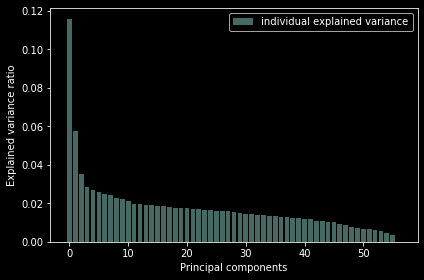

In [18]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(57), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

The first three mainly responsible for high variance data

In [116]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)
X_new

array([[-1.18516855,  2.06743422,  0.035929  ],
       [-1.46766721,  5.02381793,  3.26022895],
       [-0.80546097,  0.42733693, -0.58805743],
       ...,
       [-0.26194286, -0.41785312,  0.35017846],
       [-0.58993185, -0.66132033, -0.5753331 ],
       [-0.73887082, -0.647762  , -0.86517898]])

In [117]:
pca.get_covariance()


array([[ 0.92173988, -0.00316202,  0.08141724, ...,  0.03891717,
         0.07856517,  0.07647528],
       [-0.00316202,  0.83765286, -0.00343552, ..., -0.00880285,
        -0.01516528, -0.01205858],
       [ 0.08141724, -0.00343552,  0.91564938, ...,  0.05257738,
         0.09954794,  0.09424106],
       ...,
       [ 0.03891717, -0.00880285,  0.05257738, ...,  0.97691728,
         0.23386058,  0.20212256],
       [ 0.07856517, -0.01516528,  0.09954794, ...,  0.23386058,
         1.22710311,  0.33911392],
       [ 0.07647528, -0.01205858,  0.09424106, ...,  0.20212256,
         0.33911392,  1.13236252]])

In [118]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.11564717, 0.05732568, 0.03514033])

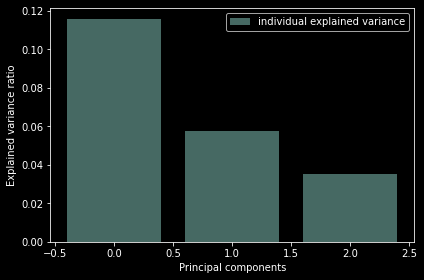

In [120]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(3), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

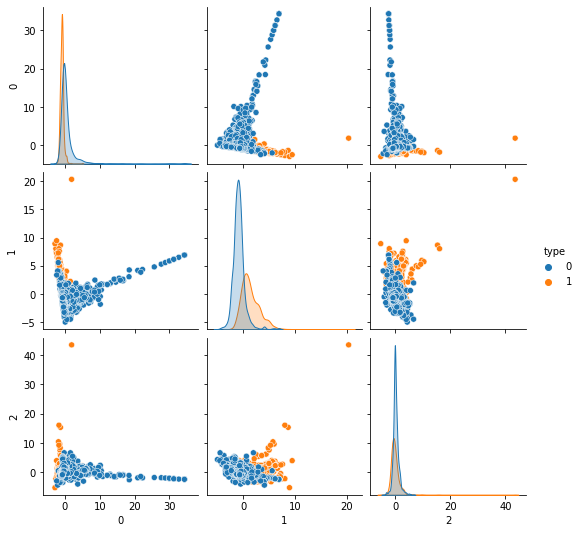

In [121]:
dummy_X = pd.DataFrame(X_new)
temp_y = np.array(y)
dummy_Y = pd.DataFrame(temp_y)
dummy_Y.columns = ['type']
plot = pd.concat([dummy_X, dummy_Y], axis=1)
sns.pairplot(data=plot, hue='type')

Splitting dataset into training set and testing set for better generalisation

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=433)

Running SVM with default hyperparameter

In [124]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score on testing data:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score on testing data:
0.8731884057971014


Default Linear kernel

In [125]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score on testing data:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score on testing data:
0.8775362318840579


Default Polynomial kernel with degree = 2

In [126]:
svc=SVC(kernel='poly', degree=2)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score on testing data:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score on testing data:
0.731159420289855


Polynomial kernel is performing poorly.The reason behind this maybe it is overfitting the training dataset

Default RBF kernel

In [127]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score on testing data:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score on testing data:
0.8731884057971014


We can conclude from above that svm by default uses rbf kernel as a parameter for kernel

Performing K-fold cross validation with different kernels

CV on Linear kernel

In [128]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X_new, y, cv=10, scoring='accuracy')
print("On Training dataset different accuracy scores are:")
print(scores)

On Training dataset different accuracy scores are:
[0.86086957 0.88695652 0.84347826 0.91521739 0.89347826 0.89347826
 0.92608696 0.88043478 0.81304348 0.81304348]


We can see above how the accuracy score is different everytime.This shows that accuracy score depends upon how the datasets got split.

In [129]:
print("Mean Accuracy score on training Data for Default Linear SVM Kernel with CV = 10")
print(scores.mean())


Mean Accuracy score on training Data for Default Linear SVM Kernel with CV = 10
0.8726086956521739


CV on rbf kernel

In [130]:
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X_new, y, cv=10, scoring='accuracy')
print("On Training dataset different accuracy scores are:")
print(scores)

On Training dataset different accuracy scores are:
[0.86521739 0.88695652 0.84782609 0.9173913  0.89130435 0.89130435
 0.91956522 0.88043478 0.8        0.80652174]


In [131]:
print("Mean Accuracy score on training Data for Default RBF SVM Kernel with CV = 10")
print(scores.mean())

Mean Accuracy score on training Data for Default RBF SVM Kernel with CV = 10
0.8706521739130434


CV on Polynomial kernel with degree  = 2

In [132]:
svc=SVC(kernel='poly', degree=2)
scores = cross_val_score(svc, X_new, y, cv=10, scoring='accuracy')
print("On Training dataset different accuracy scores are:")
print(scores)

On Training dataset different accuracy scores are:
[0.67608696 0.66956522 0.70652174 0.75869565 0.73043478 0.73043478
 0.75217391 0.75217391 0.76521739 0.7826087 ]


In [133]:
print("Mean Accuracy score on training Data for Default polynomial(deg=2) SVM Kernel with CV = 10")
print(scores.mean())

Mean Accuracy score on training Data for Default polynomial(deg=2) SVM Kernel with CV = 10
0.7323913043478261


Taking all the values of C and checking out the accuracy scores

LINEAR KERNEL

In [134]:
C_range=list(range(1,20))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X_new, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print("On Training dataset different accuracy scores are:")
print(acc_score)

On Training dataset different accuracy scores are:
[0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739]


Text(0, 0.5, 'Cross-Validated Accuracy')

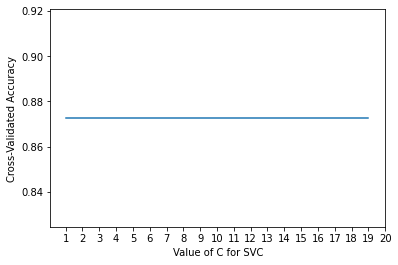

In [135]:
C_values=list(range(1,20))
plt.plot(C_values,acc_score)
plt.xticks(np.arange(1,21,1))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

Let us look into more detail of what is the exact value of C which is giving us a good accuracy score

In [136]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X_new, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.8728260869565219, 0.872608695652174, 0.8728260869565219, 0.8728260869565219, 0.8728260869565219, 0.8728260869565219, 0.8728260869565219, 0.8728260869565219, 0.8728260869565219, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 0.8726086956521739, 

Text(0, 0.5, 'Cross-Validated Accuracy')

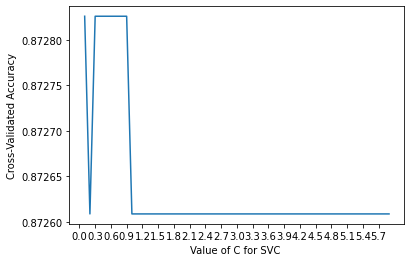

In [137]:
C_values=list(np.arange(0.1,6,0.1))
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0.0,6,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

Accuracy score is highest for C=0.3

RBF KERNEL

In [138]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='rbf', C=c)
    scores = cross_val_score(svc, X_new, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print("On Training dataset different accuracy scores are:")
print(acc_score)

On Training dataset different accuracy scores are:
[0.8706521739130434, 0.8706521739130434, 0.8719565217391303, 0.8730434782608695, 0.8723913043478262, 0.8726086956521739, 0.871304347826087, 0.8717391304347826, 0.8704347826086958, 0.8700000000000001, 0.8697826086956522, 0.8704347826086956, 0.8706521739130434, 0.8708695652173912, 0.8704347826086956, 0.871086956521739, 0.8713043478260868, 0.8717391304347826, 0.8708695652173913, 0.871304347826087, 0.8710869565217392, 0.8706521739130435, 0.8715217391304348, 0.871304347826087, 0.871304347826087]


Text(0, 0.5, 'Cross-Validated Accuracy')

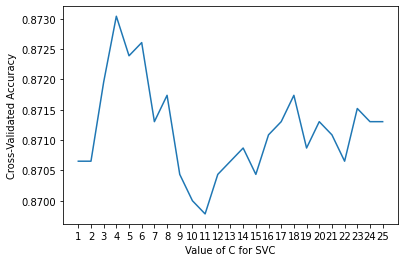

In [139]:
C_values=list(range(1,26))
plt.plot(C_values,acc_score)
plt.xticks(np.arange(1,26,1))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

Can see that the accuracy is highest for C = 4

Testing for small values of C

In [143]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='rbf', C=c)
    scores = cross_val_score(svc, X_new, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.8663043478260869, 0.8682608695652174, 0.8678260869565217, 0.8693478260869565, 0.8689130434782608, 0.8693478260869567, 0.8686956521739131, 0.8693478260869567, 0.8700000000000001, 0.8706521739130434, 0.8702173913043477, 0.8702173913043477, 0.8708695652173912, 0.8704347826086956, 0.8699999999999999, 0.871086956521739, 0.8708695652173912, 0.8706521739130434, 0.8704347826086956, 0.8706521739130434, 0.871086956521739, 0.8708695652173912, 0.872173913043478, 0.8717391304347825, 0.8717391304347825, 0.8715217391304346, 0.8717391304347825, 0.8719565217391303, 0.8719565217391303, 0.8719565217391303, 0.8723913043478261, 0.872173913043478, 0.872173913043478, 0.872173913043478, 0.8719565217391303, 0.8717391304347825, 0.8719565217391303, 0.8726086956521739, 0.8728260869565216, 0.8730434782608695, 0.8730434782608695, 0.8730434782608695, 0.8730434782608695, 0.8728260869565216, 0.8723913043478261, 0.8723913043478261, 0.8728260869565219, 0.8723913043478262, 0.8723913043478262, 0.8723913043478262, 0.872

Text(0, 0.5, 'Cross-Validated Accuracy')

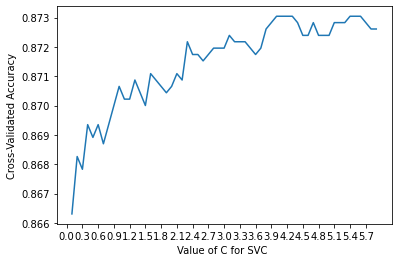

In [144]:
C_values=list(np.arange(0.1,6,0.1))
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0.0,6,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

For C = 4 highest accuracy score is obtained

FOR POLYNOMIAL KERNEL OF DEGREE  = 2

In [140]:
C_range=list(range(1,100))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='poly', C=c, degree=2)
    scores = cross_val_score(svc, X_new, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print("On Training dataset different accuracy scores are:")
print(acc_score)

On Training dataset different accuracy scores are:
[0.7323913043478261, 0.7352173913043477, 0.7423913043478261, 0.7473913043478262, 0.7515217391304347, 0.7523913043478261, 0.7521739130434782, 0.753695652173913, 0.7547826086956523, 0.7554347826086957, 0.7552173913043478, 0.7560869565217392, 0.756304347826087, 0.7563043478260869, 0.7558695652173913, 0.7558695652173913, 0.7552173913043478, 0.7563043478260869, 0.7558695652173913, 0.7560869565217392, 0.7563043478260869, 0.7565217391304347, 0.7569565217391304, 0.7569565217391304, 0.7571739130434783, 0.7571739130434783, 0.7571739130434783, 0.7565217391304347, 0.7565217391304347, 0.7565217391304347, 0.7567391304347826, 0.7569565217391304, 0.7567391304347826, 0.7567391304347826, 0.7567391304347826, 0.7567391304347826, 0.7567391304347826, 0.7567391304347826, 0.7567391304347826, 0.7567391304347826, 0.7567391304347826, 0.7571739130434783, 0.7573913043478261, 0.7573913043478261, 0.7573913043478261, 0.7573913043478261, 0.7573913043478261, 0.75739130

Text(0, 0.5, 'Cross-Validated Accuracy')

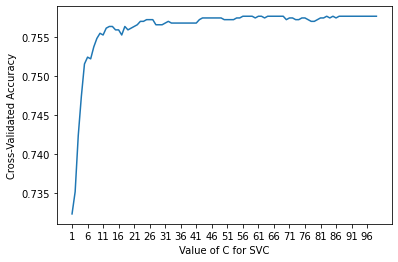

In [141]:
C_values=list(range(1,100))
plt.plot(C_values,acc_score)
plt.xticks(np.arange(1,100,5))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

for C around 51-60 the accuracy is highest.
Lets have more closer look

In [148]:
(acc_score[50:61])

[0.8728260869565219,
 0.8728260869565219,
 0.8728260869565219,
 0.8730434782608697,
 0.8730434782608697,
 0.8730434782608697,
 0.8728260869565216,
 0.8726086956521739,
 0.8726086956521739]

Thus the highest  accuracy is obtained for C = 53

Now performing SVM by taking hyperparameter C=0.3 and kernel as linear

In [149]:
svc= SVC(kernel='linear',C=0.3)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print("Accuracy on testing data")
print(accuracy_score)

Accuracy on testing data
0.8775362318840579


In [152]:
svc=SVC(kernel='linear',C=0.3)
scores = cross_val_score(svc, X_new, y, cv=10, scoring='accuracy')
print("Accuracy on Training data")
print(scores.mean())

Accuracy on Training data
0.8728260869565219


Now performing SVM by taking hyperparameter C=4 and kernel as rbf

In [153]:
svc= SVC(kernel='rbf',C=4)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
print("Accuracy on testing data:")
metrics.accuracy_score(y_test,y_predict)

Accuracy on testing data:


0.8717391304347826

In [154]:
svc=SVC(kernel='linear',C=4)
scores = cross_val_score(svc, X_new, y, cv=10, scoring='accuracy')
print("Accuracy on training data:")
print(scores.mean())

Accuracy on training data:
0.8726086956521739


Now performing SVM by taking hyperparameter degree=2 and kernel as poly and C = 53

In [155]:
svc= SVC(kernel='poly',degree=2, C = 53)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print("Accuracy on testing data:")
print(accuracy_score)

Accuracy on testing data:
0.7471014492753624


In [156]:
svc=SVC(kernel='poly',degree=2, C = 53)
scores = cross_val_score(svc, X_new, y, cv=10, scoring='accuracy')
print("Accuracy on training data:")
print(scores.mean())

Accuracy on training data:
0.7571739130434783
